In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import pytesseract
import easyocr

In [2]:
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Modele yolo v4
net = cv2.dnn.readNet("dnn_model/yolov4-obj_last.weights", "dnn_model/yolov4-obj.cfg")
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416,416), # plus grand est l'image, meilleur est la precision mais le processus est lent
                     scale=1/255)
# Liste des differentes categories d'objets que le modele de reseau (yolo) detecte pour Coco
classes = []
with open("dnn_model/classes.txt","r") as file_object:
    for class_name in file_object.readlines():
        class_name = class_name.strip()
        classes.append(class_name)
print(classes)
count = 0

["plaque d'immatriculation"]


~ 0 0 0 0 0



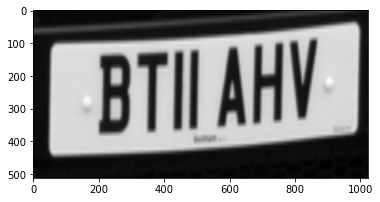

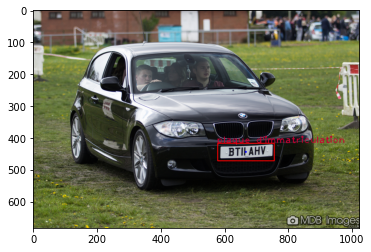

In [3]:
# Appliquons le detecteur sur une image
path = "img_char_test2.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#reader = easyocr.Reader(['en'])
count += 1
class_ids, scores, bboxes =model.detect(img, nmsThreshold=0.4, confThreshold=0.5)
for class_id, score, bboxe in zip(class_ids, scores, bboxes):
    x, y, w, h = bboxe
    roi = img[y:y+h,x:x+w]
    #print(roi.shape)
    hroi, wroi,_ = roi.shape
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (1024,512))
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    print(pytesseract.pytesseract.image_to_boxes(roi))
    boxes = pytesseract.pytesseract.image_to_boxes(roi)
    #result = reader.readtext(roi)
    #print(result)
    
    
    class_name = classes[class_id]
    cx = int(x + w/2)
    cy = int(y + h/2)
    cv2.putText(img, class_name, (x-3,y), cv2.FONT_HERSHEY_PLAIN, 2, (200,0,50), 2)
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    cv2.circle(img, (cx,cy), 3, (0,0,255), -1)
plt.imshow(roi, cmap='gray')
plt.figure()
plt.imshow(img)